<a href="https://colab.research.google.com/github/scadriano/lia1_2025_1/blob/main/Modelo%20para%20Identificar%20Cats%20or%20Dogs/Aula_09_Construindo_um_modelo_com_TensorFlow_Dogs%26Cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Construindo um Modelo com Tensorflow -  🐶 🐱!**

**Problema: uma imagem, dizer se é um dog ou um cat.**

Computer Vision; Deep Learning; Machine Learning; Artificial Inteligence! Nada disso faz sentido sem dados, muitos dados (Big Data! 🚀). Para isso, teremos:

* **Treinamento**: 25.000 imagens nomeadas: 12.500 de dogs e 12.500 de cats.
* **Teste**: 1.000 imagens de dogs e cats.

Usa-se os dados de treino para treinar o algoritmo e então criar o modelo preditivo. Usa-se os dados de teste para confirmar o desempenho do modelo preditivo já treinado, ou seja, apresenta-se ao modelo preditivo dados que ele não viu durante o treinamento, a fim de garantir que ele seja capaz de fazer previsões.

Por fim, o modelo de duas camadas de convolução seguidas de pooling, a camada de flattening, e as camadas totalmente conectadas (Dense), com a função de ativação sigmoid para a saída binária.

**Não há mágica. Há matemática!** 🧙

**Fonte de dados**

O Kaggle oferece diversos datasets públicos que podem ser usados para você desenvolver seus projetos e incluir no seu portfólio, uma excelente forma de demonstrar suas habilidades em Data Science e Machine Learning. Usaremos como fonte de dados, o famoso [dataset Dogs and Cats](https://www.kaggle.com/c/dogs-vs-cats/data).

**Carregando os dados de Treino e Teste**

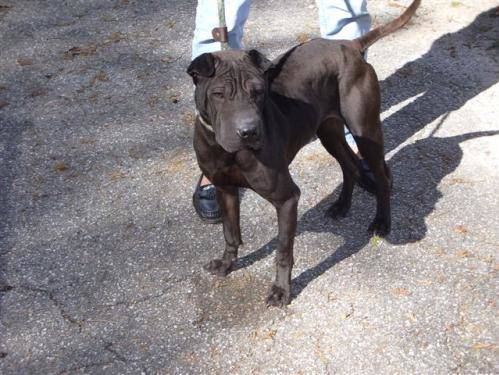

In [46]:
# Do dataset de treino, carregue uma imagem de cachorro
from IPython.display import Image
Image(filename='dataset_treino/dogs/dog.97.jpg')


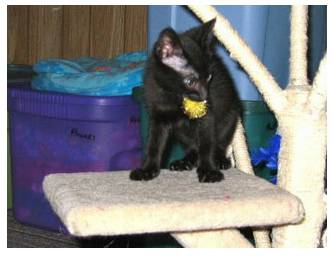

In [47]:
# Do dataset de treino, carregue uma imagem de gato
from IPython.display import Image
Image(filename='dataset_treino/cats/cat.23.jpg')

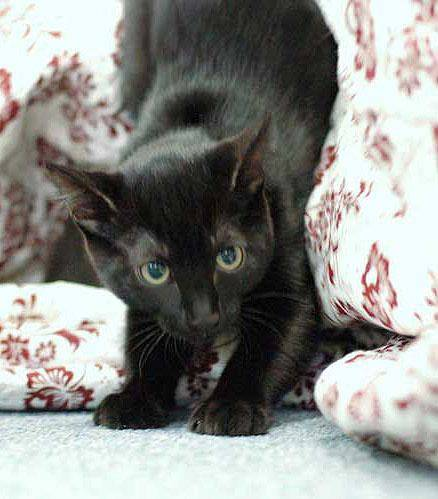

In [48]:
# Do dataset de teste, carregue uma imagem de gato ou de cachorro
from IPython.display import Image
Image(filename='dataset_teste/53.jpg')

**Construindo a Rede Neural Convolucional**

O Keras é uma biblioteca do TensorFlow.

In [49]:
import tensorflow as tf
import keras as K
# Importar K e suas funções necessárias
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization 
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [50]:
from keras import backend as K
K.clear_session()

In [51]:
# Inicializando a Rede Neural Convolucional
classifier = Sequential()

In [52]:
# Camadas convolucionais + pooling
classifier.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Conv2D(128, (3, 3), activation='relu'))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Camada de achatamento
classifier.add(Flatten())

# Camadas densas
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(units=1, activation='sigmoid'))

# Compilar o modelo
classifier.compile(optimizer=Adam(learning_rate=0.0001),
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

### **Pré-processamento**

Fazer pré-processamento nos dados, em nosso caso as imagens.

In [56]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Criar o objeto com as regras de pré-processamento
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.2 )

In [57]:
# Pré-processamento das imagens de treino
training_set = train_datagen.flow_from_directory('dataset_treino',
                                                 target_size = (256, 256),
                                                 batch_size = 64,
                                                 class_mode = 'binary',
                                                 subset='training')

Found 802 images belonging to 2 classes.


In [58]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

### **Treinamento do Modelo**

In [59]:
history = classifier.fit(
    training_set,
    steps_per_epoch=25,
    validation_data=training_set,  # importante para visualizar val_accuracy e val_loss
    validation_steps=100,            # ajuste com base no tamanho do seu conjunto de validação
    callbacks=[early_stopping],
    epochs=10)

Epoch 1/10
13/25 ━━━━━━━━━━━━━━━━━━━━ 11s 958ms/step - accuracy: 0.5797 - loss: 0.8479

C:\Users\Luiz Henrique Silva\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 862ms/step - accuracy: 0.5923 - loss: 0.8785 - val_accuracy: 0.5212 - val_loss: 0.6858
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 827ms/step - accuracy: 0.6428 - loss: 0.7798 - val_accuracy: 0.6072 - val_loss: 0.6839
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 857ms/step - accuracy: 0.6907 - loss: 0.5877 - val_accuracy: 0.7718 - val_loss: 0.6782
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 834ms/step - accuracy: 0.7505 - loss: 0.5035 - val_accuracy: 0.6995 - val_loss: 0.6677
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 865ms/step - accuracy: 0.7769 - loss: 0.4986 - val_accuracy: 0.7968 - val_loss: 0.6628
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 897ms/step - accuracy: 0.8096 - loss: 0.4274 - val_accuracy: 0.8242 - val_loss: 0.6514
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 886ms/step - accuracy: 0.8186 - loss: 0.4094 - val_accuracy: 0.7631 - val_loss: 0.6563
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 878ms/step - accuracy: 0.8402 - loss: 0.3915 - val_accuracy: 0.810

In [60]:
# Novas métricas
from sklearn.metrics import classification_report

# Previsões no conjunto de validação
training_set.reset()
Y_pred = classifier.predict(training_set, steps=len(training_set))
y_pred = (Y_pred > 0.5).astype(int)

# Labels reais
y_true = training_set.classes

# Relatório de classificação
print("Relatório:")
print(classification_report(y_true, y_pred, target_names=list(training_set.class_indices.keys())))

13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 614ms/step
Relatório:
              precision    recall  f1-score   support

        cats       0.48      0.55      0.52       401
        dogs       0.48      0.41      0.44       401

    accuracy                           0.48       802
   macro avg       0.48      0.48      0.48       802
weighted avg       0.48      0.48      0.48       802



Treinamento concluído com sucesso! 💪 Observe se ao final de cada época a acurácia aumenta.

## **Teste do Modelo**

Testar o modelo treinado com imagens que ele ainda não viu. Por fim, verificamos o resultado da previsão e emitimos a informação se a imagem é de um gato ou cachorro.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Previsão: Gato.
Acurácia: 53.18 %.


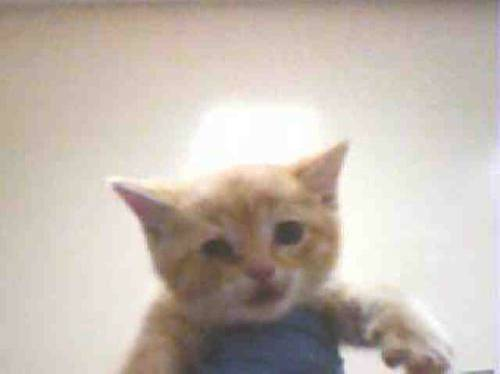

In [61]:
import numpy as np
from keras.preprocessing import image
from IPython.display import Image

# Carregando a imagem de teste
test_image = image.load_img('dataset_teste/150.jpg', target_size=(256, 256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0  # Normalizar a imagem

# Fazendo a previsão usando o modelo classifier
result = classifier.predict(test_image)
class_indices = training_set.class_indices

if result[0][0] >= 0.5:
    prediction = 'Cachorro.'
    accuracy = round(result[0][0] * 100, 2)  # A saída de previsão é uma probabilidade entre 0 e 1
else:
    prediction = 'Gato.'
    accuracy = round((1 - result[0][0]) * 100, 2)  # A saída de previsão é uma probabilidade entre 0 e 1

# Exibindo a previsão e a acurácia
print("Previsão:", prediction)
print("Acurácia:", accuracy, "%.")

# Exibindo a imagem
Image(filename='dataset_teste/150.jpg')

### **Matriz de Confusão para análise:**

13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 600ms/step


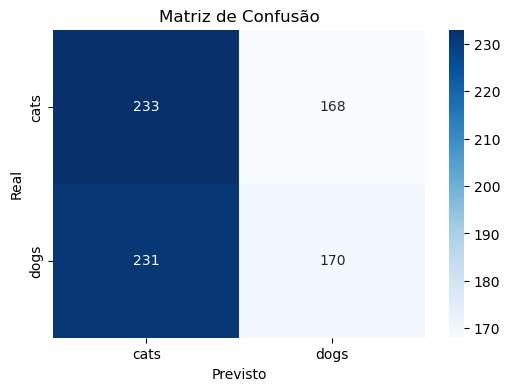

Relatório de Classificação:
              precision    recall  f1-score   support

        cats       0.50      0.58      0.54       401
        dogs       0.50      0.42      0.46       401

    accuracy                           0.50       802
   macro avg       0.50      0.50      0.50       802
weighted avg       0.50      0.50      0.50       802



In [62]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Garante que os dados do generator não estão bagunçados
training_set.reset()

# Previsões
Y_pred = classifier.predict(training_set)  # sem "steps"
y_pred = (Y_pred > 0.5).astype(int).reshape(-1)

# Rótulos reais
y_true = training_set.classes

# Matriz de confusão
cm = confusion_matrix(y_true, y_pred)

# Exibe a matriz
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=training_set.class_indices.keys(), yticklabels=training_set.class_indices.keys())
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

# Relatório de desempenho
print("Relatório de Classificação:")
print(classification_report(y_true, y_pred, target_names=list(training_set.class_indices.keys())))

### **Gráfico de Acurácia**

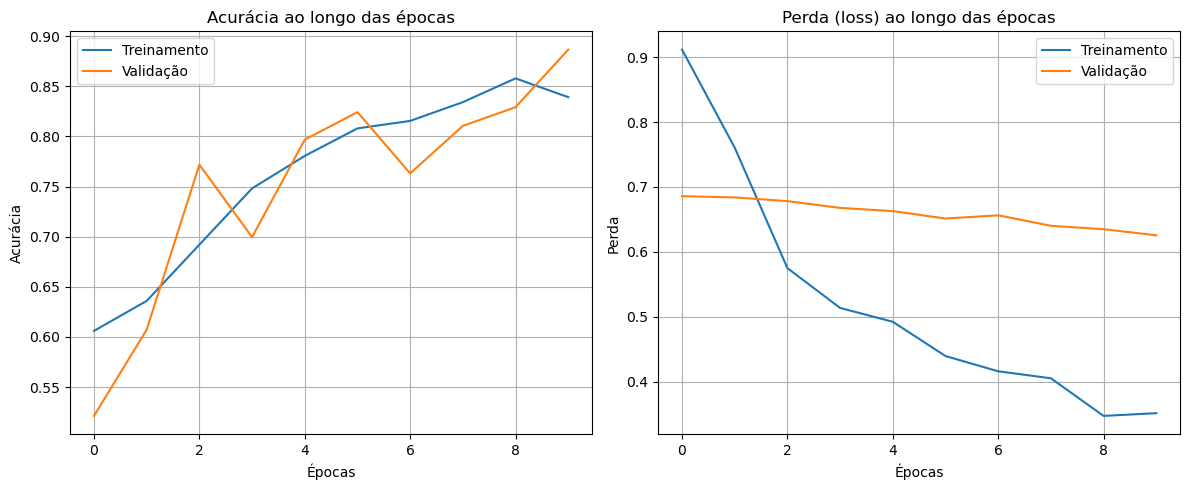

In [63]:
import matplotlib.pyplot as plt

# Gráfico de acurácia
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Treinamento')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia ao longo das épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)

# Gráfico de perda
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Perda (loss) ao longo das épocas')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

**O modelo recebeu uma imagem que nunca tinha visto antes e com base no que aprendeu durante o treinamento, foi capaz de classificar.**

Convertemos a imagem de teste em um vetor de pixels e apresentamos ao modelo.
O modelo compara o vetor da imagem de teste com seus pesos e então emite a classificação.

**Melhorias adicionais para este modelo:**

*   Aumentar o número de épocas para 25 para uma aprendizagem mais profunda.
*   aumentar o redimensionamento da imagem de 64x64 para 256x256.
*   Aumentar o tamanho do lote de 32 para 64.
*   Alterar a arquitetura da rede incluindo mais uma camada convolucional.
*   Avaliar outras métricas do modelo e ajustar os hiperparâmetros de acordo.
*   Experimentar outros algoritmos de otimização.








Fim! 🔥